In [5]:
import sys
# !{sys.executable} -m pip install --upgrade pip
!{sys.executable} -m pip install scikit-learn

In [6]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
data = pd.read_csv(r'BlackFriday.csv', sep=",")

In [3]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [14]:
data.shape

(537577, 12)

In [15]:
data.dtypes

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
dtype: object

In [4]:
for col in data.columns:
    print('{} unique element: {}'.format(col,data[col].nunique()))

User_ID unique element: 5891
Product_ID unique element: 3623
Gender unique element: 2
Age unique element: 7
Occupation unique element: 21
City_Category unique element: 3
Stay_In_Current_City_Years unique element: 5
Marital_Status unique element: 2
Product_Category_1 unique element: 18
Product_Category_2 unique element: 17
Product_Category_3 unique element: 15
Purchase unique element: 17959


In [6]:
for col in data.columns:
    # Количество пустых значений - все значения заполнены
    temp_null_count = data[data[col].isnull()].shape[0]
    print('{} - {}'.format(col, temp_null_count))
    
missing_ser_percentage = (data.isnull().sum()/data.shape[0]*100).sort_values(ascending=False)
missing_ser_percentage = missing_ser_percentage[missing_ser_percentage!=0].round(2)
missing_ser_percentage.name = 'missing values %'
print('\n<NaN ratio>')
print(missing_ser_percentage)

User_ID - 0
Product_ID - 0
Gender - 0
Age - 0
Occupation - 0
City_Category - 0
Stay_In_Current_City_Years - 0
Marital_Status - 0
Product_Category_1 - 0
Product_Category_2 - 166986
Product_Category_3 - 373299
Purchase - 0

<NaN ratio>
Product_Category_3    69.44
Product_Category_2    31.06
Name: missing values %, dtype: float64


In [7]:
data2 = data
data2.drop(columns = ["User_ID","Occupation", 'Marital_Status', 'Product_Category_1', 'Product_Category_2', 'Product_Category_3'],inplace=True)
data2.describe()

,Purchase
count,537577.000000
mean,9333.859853
std,4981.022133
min,185.000000
25%,5866.000000
50%,8062.000000
75%,12073.000000
max,23961.000000


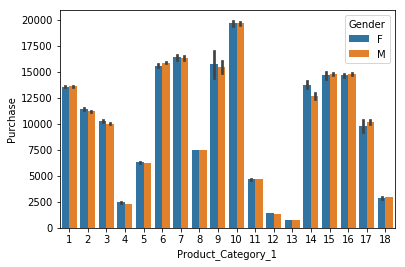

In [4]:
ax = sns.barplot(x="Product_Category_1", y="Purchase", hue="Gender", data=data)

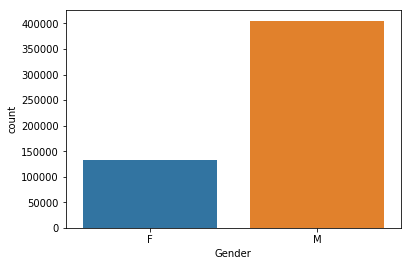

In [6]:
sns.countplot(data['Gender'])

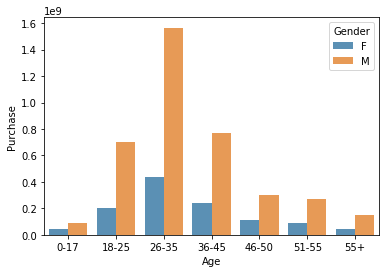

In [57]:
age_order = ['0-17','18-25','26-35','36-45','46-50','51-55','55+']
df_Tpurchase_by_Age = data.groupby(['Age','Gender']).agg({'Purchase': sum}).reset_index()
sns.barplot('Age','Purchase',hue='Gender',data=df_Tpurchase_by_Age, alpha = 0.8)

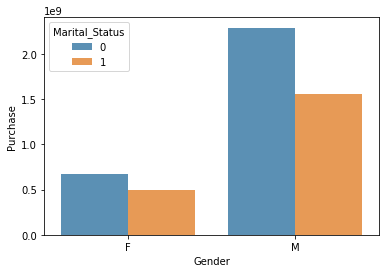

In [64]:
qq = data.groupby(['Gender','Marital_Status']).agg({'Purchase': sum}).reset_index()
sns.barplot('Gender','Purchase',hue='Marital_Status',data=qq, alpha = 0.8)


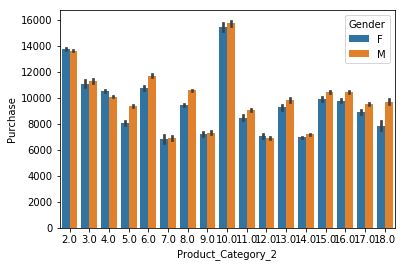

In [12]:
ax = sns.barplot(x="Product_Category_2", y="Purchase", hue="Gender", data=data)

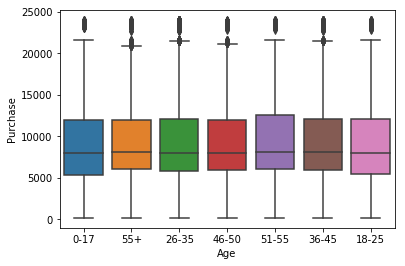

In [13]:
sns.boxplot('Age','Purchase', data = data)

5017668378 3732568444 1915646035


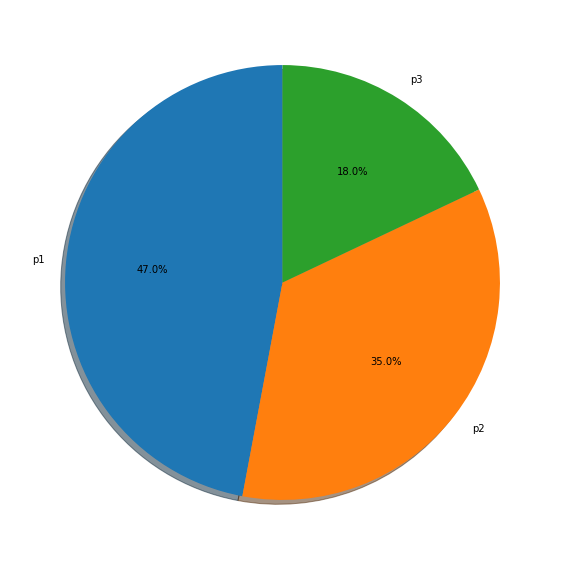

In [37]:
p1 = data.groupby('Product_Category_1')['Purchase'].sum().sum()
p2 = data.groupby('Product_Category_2')['Purchase'].sum().sum()
p3 = data.groupby('Product_Category_3')['Purchase'].sum().sum()
products = [p1, p2, p3]
labels = ['p1', 'p2', 'p3']
fig, ax = plt.subplots(figsize=(10,10))
ax.pie(products, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
print(p1, p2, p3)

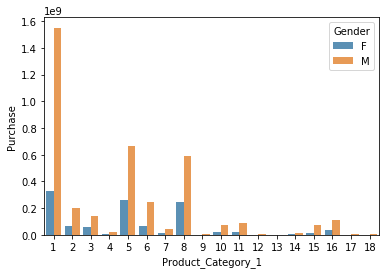

In [40]:
df_Tpurchase_by_PC1_Gender = data.groupby(['Product_Category_1','Gender']).agg({'Purchase':np.sum}).reset_index()
sns.barplot('Product_Category_1','Purchase',hue='Gender',data=df_Tpurchase_by_PC1_Gender,alpha = 0.8)

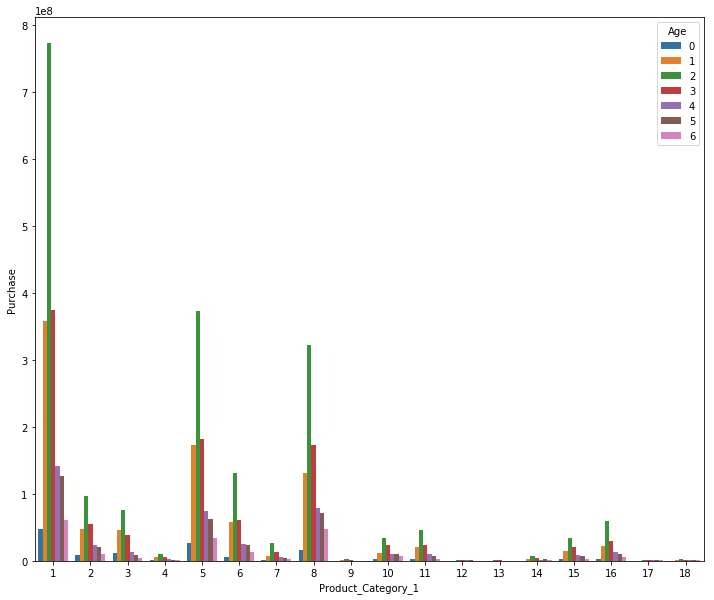

In [48]:
df_Tpurchase_by_PC1_Age = data.groupby(['Product_Category_1','Age']).agg({'Purchase':np.sum}).reset_index()
fig = plt.figure(figsize=(12,10))
sns.barplot('Product_Category_1','Purchase',hue='Age',data=df_Tpurchase_by_PC1_Age)

<Figure size 1440x360 with 0 Axes>

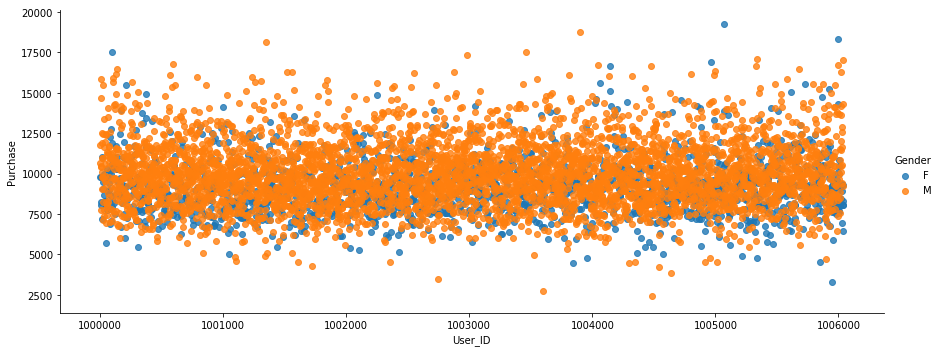

<Figure size 1440x360 with 0 Axes>

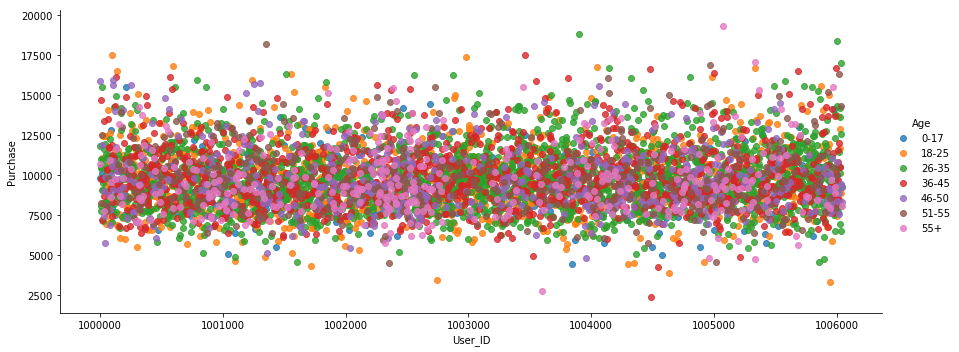

In [11]:
Avgpurchase_by_UID_Gender = data.groupby(['User_ID','Gender']).agg({'Purchase':np.mean}).reset_index()
Avgpurchase_by_UID_Age = data.groupby(['User_ID','Age']).agg({'Purchase':np.mean}).reset_index()
age_order = ['0-17','18-25','26-35','36-45','46-50','51-55','55+']
plt.figure(figsize=(20,5))
sns.lmplot('User_ID','Purchase',data=Avgpurchase_by_UID_Gender,fit_reg=False,hue='Gender',aspect=2.5)
plt.figure(figsize=(20,5))
sns.lmplot('User_ID','Purchase',data=Avgpurchase_by_UID_Age,fit_reg=False,hue='Age',hue_order=age_order,aspect=2.5)

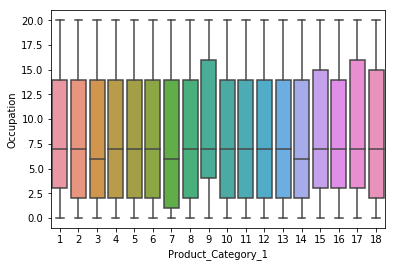

In [13]:
age_order = ['0-17','18-25','26-35','36-45','46-50','51-55','55+']
sns.boxplot(x=data['Product_Category_1'], y = data['Occupation'])

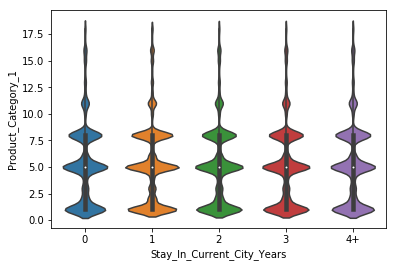

In [6]:
stay_order = ['0','1','2','3','4+']
sns.violinplot(x=data['Stay_In_Current_City_Years'], y = data['Product_Category_1'], order = stay_order)
# sns.violinplot(x=data['Purchase'], y = data['Stay_In_Current_City_Years'])

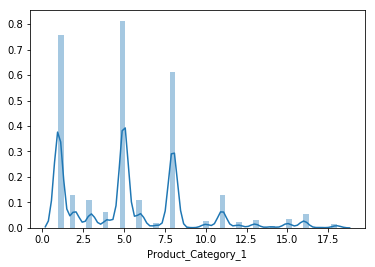

In [4]:
sns.distplot(data['Product_Category_1'])

,User_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
User_ID,1.000000,-0.031898,0.033359,-0.023024,0.024107,-0.030655,0.018732,0.003687,0.001471,0.004045,0.005389
Gender,-0.031898,1.000000,-0.004413,0.117294,-0.004129,0.015392,-0.010379,-0.045661,-0.018440,0.028403,0.060086
Age,0.033359,-0.004413,1.000000,0.091898,0.122308,-0.004754,0.312079,0.061951,0.054762,0.057155,0.017717
Occupation,-0.023024,0.117294,0.091898,1.000000,0.033781,0.031203,0.024691,-0.008114,-0.000031,0.013452,0.021104
City_Category,0.024107,-0.004129,0.122308,0.033781,1.000000,0.019948,0.040173,-0.027444,-0.012120,-0.002672,0.068507
Stay_In_Current_City_Years,-0.030655,0.015392,-0.004754,0.031203,0.019948,1.000000,-0.012663,-0.004182,-0.001781,0.002039,0.005470
Marital_Status,0.018732,-0.010379,0.312079,0.024691,0.040173,-0.012663,1.000000,0.020546,0.015116,0.019452,0.000129
Product_Category_1,0.003687,-0.045661,0.061951,-0.008114,-0.027444,-0.004182,0.020546,1.000000,0.540423,0.229490,-0.314125
Product_Category_2,0.001471,-0.018440,0.054762,-0.000031,-0.012120,-0.001781,0.015116,0.540423,1.000000,0.543544,-0.209973
Product_Category_3,0.004045,0.028403,0.057155,0.013452,-0.002672,0.002039,0.019452,0.229490,0.543544,1.000000,-0.022257


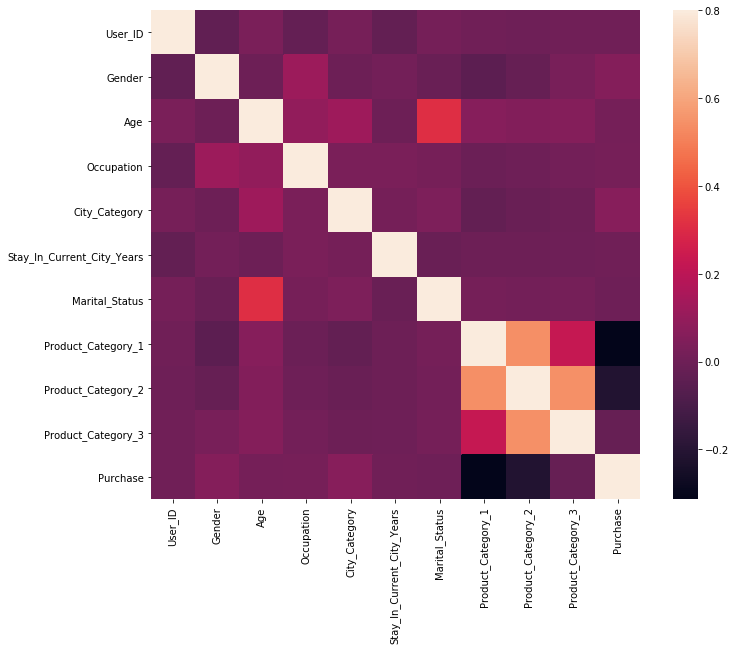

In [8]:
from sklearn.preprocessing import LabelEncoder 
lb = LabelEncoder()
data1 = data
data1['Gender'] = lb.fit_transform(data1['Gender'])
data1['Age'] = lb.fit_transform(data1['Age'])
data1['City_Category'] = lb.fit_transform(data1['City_Category'])
data1['Stay_In_Current_City_Years'] = lb.fit_transform(data1['Stay_In_Current_City_Years'])
data1.corr()
corrmat = data1.corr()
fig,ax = plt.subplots(figsize = (12,9))
sns.heatmap(corrmat, vmax=.8, square=True)
corrmat

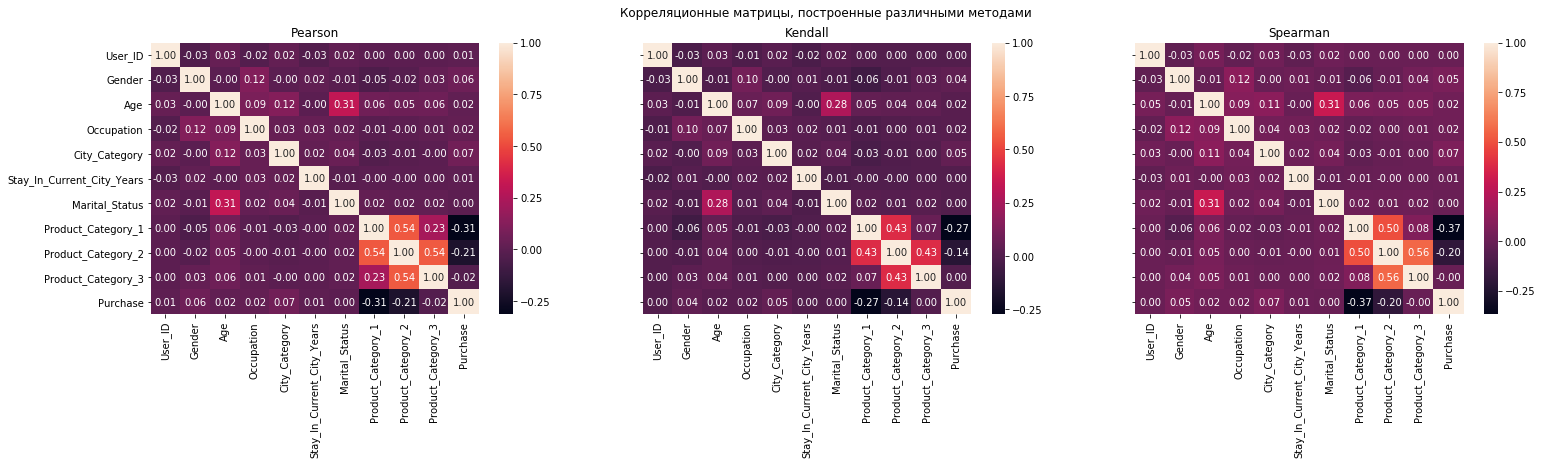

In [11]:
fig, ax = plt.subplots(1, 3, sharex='col', sharey='row', figsize=(25,5))
sns.heatmap(data1.corr(method='pearson'), ax=ax[0], annot=True, fmt='.2f')
sns.heatmap(data1.corr(method='kendall'), ax=ax[1], annot=True, fmt='.2f')
sns.heatmap(data1.corr(method='spearman'), ax=ax[2], annot=True, fmt='.2f')
fig.suptitle('Корреляционные матрицы, построенные различными методами')
ax[0].title.set_text('Pearson')
ax[1].title.set_text('Kendall')
ax[2].title.set_text('Spearman')

In [9]:
sf1= data1.groupby('Occupation')['Product_Category_1'].sum()
dataByOcc = pd.DataFrame({'Occupation':sf1.index, 'Product_Category_1':sf1.values})

sf2= data1.groupby('Occupation')['Product_Category_2'].sum()
dataByOcc['Product_Category_2'] =sf2

# for ages 
sf1= data1.groupby('Age')['Product_Category_1'].sum()
dataByAge = pd.DataFrame({'AgeCategory':sf1.index, 'Product_Category_1':sf1.values})

sf2= data1.groupby('Age')['Product_Category_2'].sum()
dataByAge['Product_Category_2'] =sf2

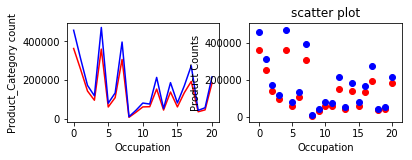

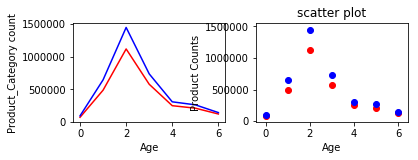

In [12]:
# draw line graph in subplot
plt.subplot(2,2,1)
plt.plot( dataByOcc.Occupation, dataByOcc.Product_Category_1, color="red", label="Product_Category_1" )
plt.plot( dataByOcc.Occupation, dataByOcc.Product_Category_2, color="blue", label="Product_Category_2" )
plt.xlabel("Occupation")
plt.ylabel("Product_Category count")

# draw scatter graph in subplot
plt.subplot(2,2,2)
plt.scatter(dataByOcc.Occupation ,dataByOcc.Product_Category_1, color="r", label="Product_Category_1")
plt.scatter(dataByOcc.Occupation ,dataByOcc.Product_Category_2, color="b", label="Product_Category_2")
plt.xlabel("Occupation")
plt.ylabel("Product Counts")
plt.title("scatter plot")
plt.show()

# draw line graph in subplot
plt.subplot(2,2,3)
plt.plot( dataByAge.AgeCategory, dataByAge.Product_Category_1, color="red", label="Product_Category_1" )
plt.plot( dataByAge.AgeCategory, dataByAge.Product_Category_2, color="blue", label="Product_Category_2" )
plt.xlabel("Age")
plt.ylabel("Product_Category count")

# draw scatter graph in subplot
plt.subplot(2,2,4)
plt.scatter(dataByAge.AgeCategory ,dataByAge.Product_Category_1, color="r", label="Product_Category_1")
plt.scatter(dataByAge.AgeCategory ,dataByAge.Product_Category_2, color="b", label="Product_Category_2")
plt.xlabel("Age")
plt.ylabel("Product Counts")
plt.title("scatter plot")
plt.show()

In [17]:
mean_ratings = data.pivot_table('Purchase', index='Product_Category_1', columns='Marital_Status', aggfunc='mean')
mean_ratings
# средняя сумма покупок 

Marital_Status,0,1
Product_Category_1,,
1,13589.086988,13635.807467
2,11184.576796,11359.482257
3,10030.810824,10201.223898
4,2307.417986,2362.602225
5,6221.209431,6262.676758
6,15861.141749,15803.820127
7,16410.850299,16329.245793
8,7481.136623,7519.303643
9,15882.016529,15024.839506


In [19]:
mean_ratings['diff'] = mean_ratings[0] - mean_ratings[1]
sorted_by_diff = mean_ratings.sort_values(by='diff')
sorted_by_diff

Marital_Status,0,1,diff
Product_Category_1,,,
2,11184.576796,11359.482257,-174.905461
3,10030.810824,10201.223898,-170.413074
14,13083.026347,13223.836090,-140.809743
17,10116.487973,10198.565217,-82.077245
16,14734.893972,14804.839290,-69.945318
4,2307.417986,2362.602225,-55.184238
1,13589.086988,13635.807467,-46.720479
15,14757.050601,14802.809216,-45.758614
5,6221.209431,6262.676758,-41.467327
